In [1]:
from us import states
from config import API_KEY
import contextily as cx
import matplotlib.pyplot as plt
import cenpy

/Users/kathrynpanger/Documents/censusMaps/venv/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/kathrynpanger/Documents/censusMaps/venv/lib/python3.8/site-packages/cenpy/tiger.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from

In [2]:
acs = cenpy.products.ACS()

In [6]:
# Median montly housing cost in dollars
variables = ['B02009_001E', 'B01003_001E']
chicago, chicago_bounds = acs.from_place('Chicago, IL', variables=variables, level = "tract", return_bounds = True)
chicago_basemap, chicago_extent = cx.bounds2img(*chicago.total_bounds, zoom=11, source=cx.providers.CartoDB.Positron)


Matched: Chicago, IL to Chicago city within layer Incorporated Places


/var/folders/lw/jy_c2z0x221fsb78kk1_h2800000gn/T/ipykernel_18688/3841809697.py:3: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  chicago, chicago_bounds = acs.from_place('Chicago, IL', variables=variables, level = "tract", return_bounds = True)


In [23]:
chicago['black_population'] = chicago.eval('B02009_001E')
chicago['total_population'] = chicago.eval('B01003_001E')
chicago["proportion_black"] = chicago["black_population"] / chicago["total_population"]
#create a variable for coordinate points to add labels
chicago['coords'] = chicago['geometry'].apply(lambda x: x.representative_point().coords[:][0])
# create a variable for populations over some quantile
quantile = chicago["proportion_black"].quantile(q = 0.9)
#chicago['pop_if_over_quantile'] = chicago["proportion_black"].apply(lambda x: x if x>quantile else " ")

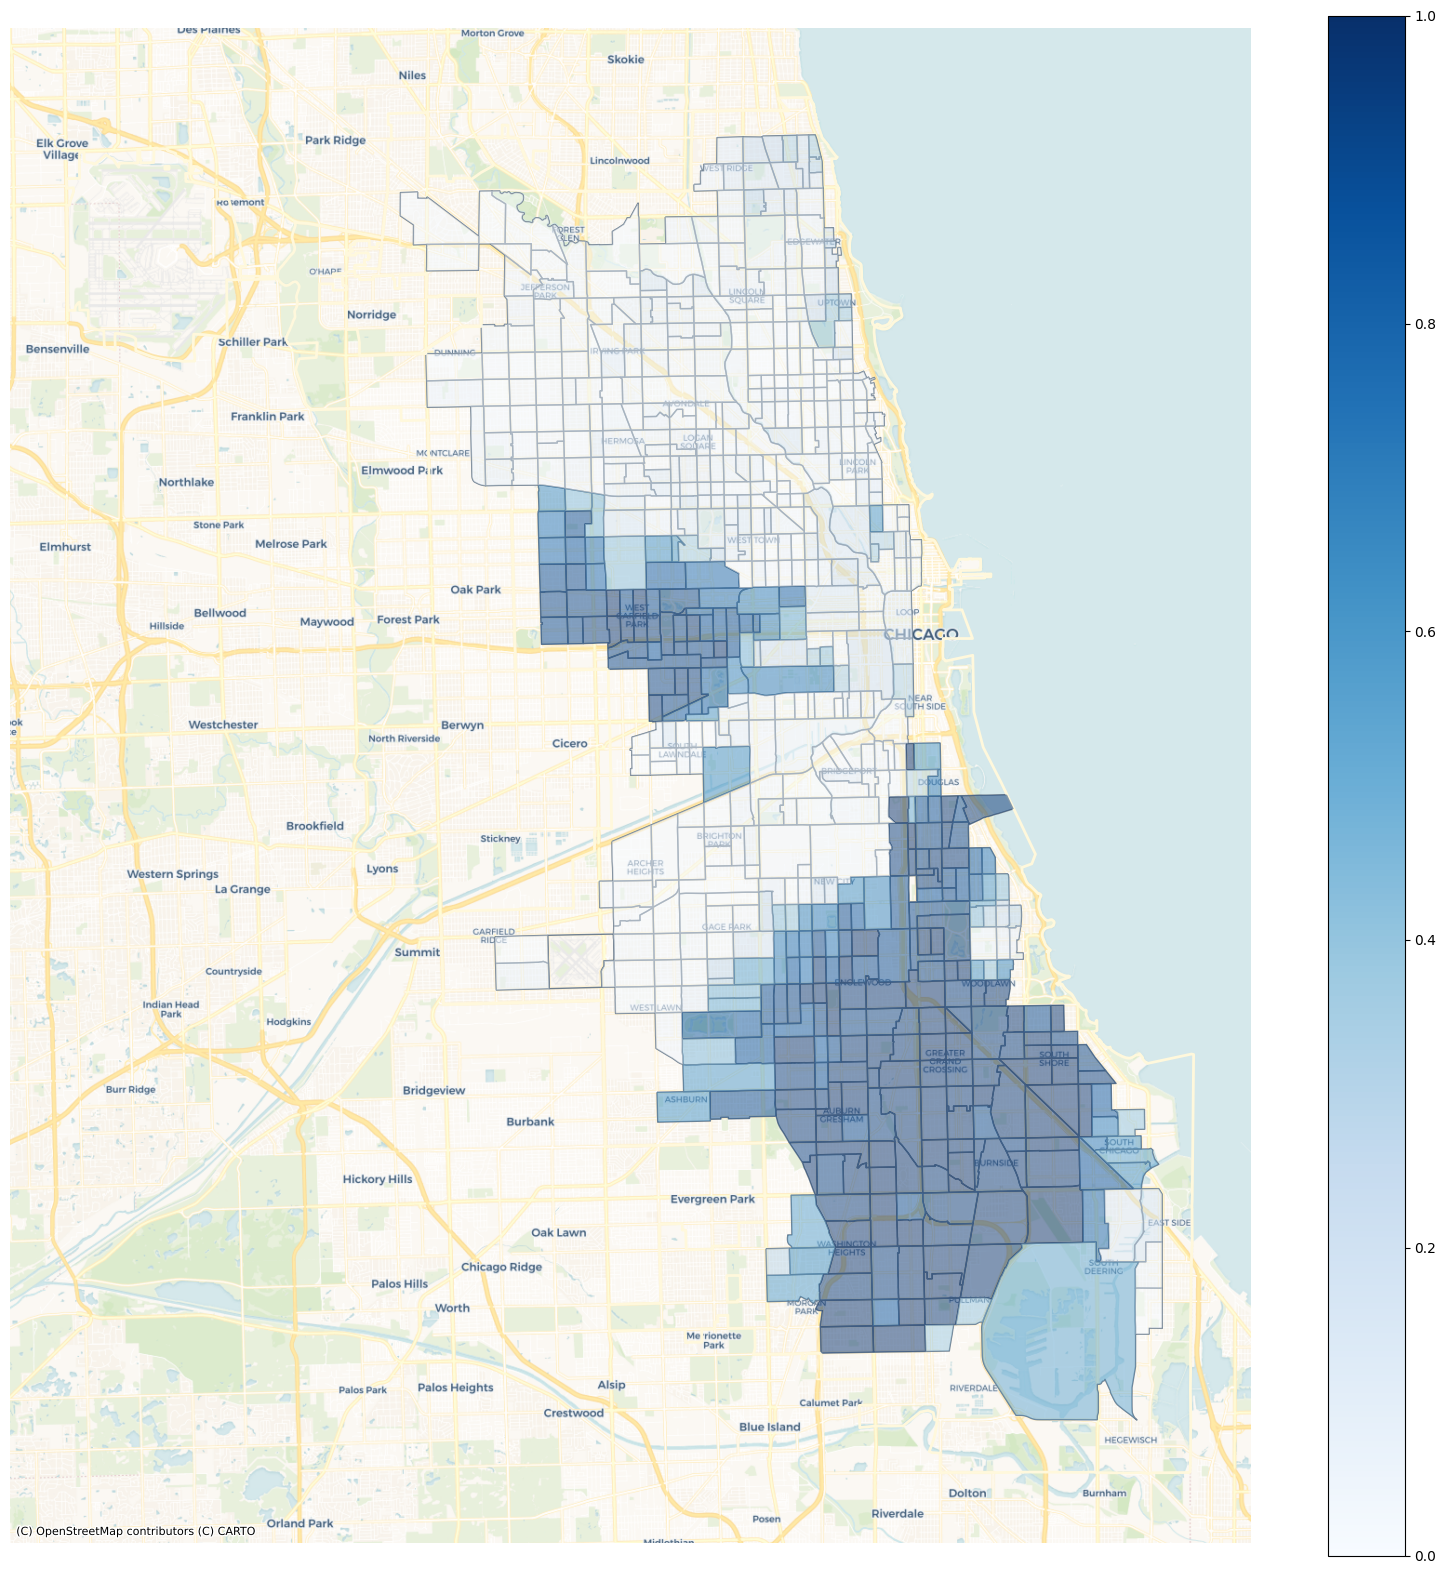

In [24]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.set_axis_off();
chicago.plot(edgecolor='slategrey', color='none', ax=ax)
chicago_bounds.plot(edgecolor='cornsilk', color='none', ax=ax, linewidth=2)
ax.set_facecolor('k')
chicago.plot('proportion_black', cmap='Blues', ax = ax, alpha=0.5, legend = True, cax = None, color = None, vmin=0, vmax=1) #add population
#chicago.apply(lambda x: ax.annotate(text=x['pop_if_over_quantile'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);#add population annotation if over quantile
cx.add_basemap(ax, crs=chicago.crs.to_string(), source=cx.providers.CartoDB.Voyager, zoom=12, alpha = 1)

In [6]:
#to do
#include on legend total population
#include on legend median tract population
#label highest populated areas only up to x% of the total population
#create maps by race
#show segregation